In [2]:
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [3]:
Top = pd.read_excel('WCRI Total Claim Cost 12_24_36 2000-2010.xlsx')
Middle = pd.read_excel('WCRI Total Claim Cost 12_24_36 2011_2017.xlsx')
Bottom = pd.read_excel('WCRI Total Claim Cost 12_24_36 2018_2023.xlsx')
First = pd.concat([Top, Middle, Bottom])
Second = pd.concat([Top, Middle, Bottom])
Third = pd.concat([Top, Middle, Bottom])

In [4]:
First

,Date of Incident/Loss,Transaction Date,Claim Status,Claim Number,Coverage Desc,Financial Category,Payee,Transaction Type,Transaction Type Desc,Period,Paid Amount
0,2000-01-19,2000-03-16,FINAL,W200001719,Workers Comp/Crew - Lost Time Treatment,Med/BI/Comp Paid,TMESYS,1P52,Vendor Medical Other,Fiscal Year - 2000,45.64
1,2000-01-19,2000-03-29,FINAL,W200001719,Workers Comp/Crew - Lost Time Treatment,Med/BI/Comp Paid,TMESYS,1P52,Vendor Medical Other,Fiscal Year - 2000,40.64
2,2000-01-19,2000-04-18,FINAL,W200001719,Workers Comp/Crew - Lost Time Treatment,Med/BI/Comp Paid,TMESYS,1P52,Vendor Medical Other,Fiscal Year - 2000,40.64
3,2000-01-19,2000-04-19,FINAL,W200001719,Workers Comp/Crew - Lost Time Treatment,Med/BI/Comp Paid,JEWETT ORTHOPAEDIC CLINIC,1P56,Other Physician,Fiscal Year - 2000,84.00
4,2000-01-19,2000-05-02,FINAL,W200001719,Workers Comp/Crew - Lost Time Treatment,Expense Paid,CORPORATE EXPRESS,2P18,Expense Misc Expense,Fiscal Year - 2000,102.68
...,...,...,...,...,...,...,...,...,...,...,...
37637,2023-03-29,2024-05-05,OPEN,WDWW2023230582,Workers Comp/Crew - Lost Time Treatment,Med/BI/Comp Paid,EXPRESS SCRIPTS INC,1P11,Pharmacy/Supplies-Rx.,Fiscal Year - 2023,1284.18
37638,2023-03-29,2024-05-10,REOPEN,WDWW2023230594,Workers Comp/Crew - Lost Time Treatment,Med/BI/Comp Paid,THOMAS WINTERS ORTHOPEDIC & SP,1P41,Orthopaedic,Fiscal Year - 2023,40.00
37639,2023-03-30,2023-05-05,FINAL,WDWW2023230591,Workers Comp/Crew - Lost Time Treatment,Med/BI/Comp Paid,EXPRESS SCRIPTS INC,1P11,Pharmacy/Supplies-Rx.,Fiscal Year - 2023,16.16
37640,2023-03-30,2023-05-19,FINAL,WDWW2023230591,Workers Comp/Crew - Lost Time Treatment,Med/BI/Comp Paid,SELECT PHYSICAL THERAPY HOLDINGS IN,1P12,Physical Therapy,Fiscal Year - 2023,300.00


In [3]:
First['Date of Incident/Loss'] = pd.to_datetime(First['Date of Incident/Loss'])
First['Transaction Date'] = pd.to_datetime(First['Transaction Date'])


In [4]:
First['End Date'] = First['Date of Incident/Loss'] + timedelta(days=365)

In [5]:
filtered_data = First[(First['Transaction Date'] >= First['Date of Incident/Loss']) & (First['Transaction Date'] <= First['End Date'])]

In [6]:
grouped_filtered_data = filtered_data.groupby('Claim Number')

In [7]:
total_paid_amount = grouped_filtered_data['Paid Amount'].sum()

In [8]:
final_df = pd.merge(total_paid_amount, First[['Claim Number', 'Date of Incident/Loss']], on='Claim Number', how='left')

In [9]:
final_df.drop_duplicates(subset='Claim Number', inplace=True)

In [10]:
final_df

,Claim Number,Paid Amount,Date of Incident/Loss
0,W200001719,2321.81,2000-01-19
89,W200001956,15652.89,2000-01-20
143,W200003311,10531.05,2000-03-04
362,W200003479,14619.60,2000-03-10
493,W200003906,8928.99,2000-03-13
...,...,...,...
301384,WDWW2023231479,5375.15,2023-03-01
301400,WDWW2023231549,7007.03,2023-03-07
301409,WDWW2023231797,4397.31,2023-02-17
301434,WDWW2023232702,6008.44,2023-02-04


In [11]:
# Extract year from 'Date of Incident/Loss' column
final_df['Year'] = final_df['Date of Incident/Loss'].dt.year

# Group by year and calculate average cost per year
average_cost_per_year = final_df.groupby('Year')['Paid Amount'].mean().reset_index()
average_cost_per_year.rename(columns={'Paid Amount': 'Average Cost Per Year'}, inplace=True)

In [12]:
average_cost_per_year

,Year,Average Cost Per Year
0,2000,26616.228636
1,2001,20071.955312
2,2002,23829.445238
3,2003,18166.290357
4,2004,14957.773627
5,2005,11424.672748
6,2006,11958.985702
7,2007,13699.648581
8,2008,16630.118706
9,2009,14781.024941


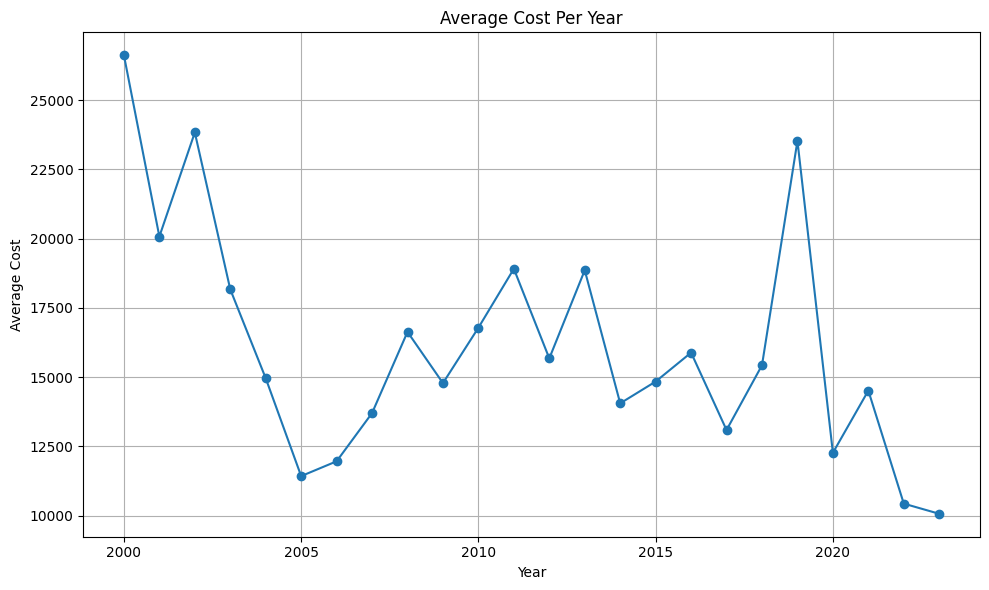

In [13]:
plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(average_cost_per_year['Year'], average_cost_per_year['Average Cost Per Year'], marker='o', linestyle='-')

# Add labels and title
plt.title('Average Cost Per Year')
plt.xlabel('Year')
plt.ylabel('Average Cost')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
Second['Date of Incident/Loss'] = pd.to_datetime(Second['Date of Incident/Loss'])
Second['Transaction Date'] = pd.to_datetime(Second['Transaction Date'])

In [15]:
Second['End Date'] = Second['Date of Incident/Loss'] + timedelta(days=730)

In [16]:
filtered_data = Second[(Second['Transaction Date'] >= Second['Date of Incident/Loss']) & (Second['Transaction Date'] <= Second['End Date'])]

In [17]:
grouped_filtered_data = filtered_data.groupby('Claim Number')

In [18]:
total_paid_amount = grouped_filtered_data['Paid Amount'].sum()

In [19]:
final_df = pd.merge(total_paid_amount, Second[['Claim Number', 'Date of Incident/Loss']], on='Claim Number', how='left')

In [20]:
final_df.drop_duplicates(subset='Claim Number', inplace=True)

In [21]:
final_df

,Claim Number,Paid Amount,Date of Incident/Loss
0,W200001719,4150.93,2000-01-19
89,W200001956,21561.39,2000-01-20
143,W200003311,13528.71,2000-03-04
362,W200003479,18501.84,2000-03-10
493,W200003906,42138.11,2000-03-13
...,...,...,...
302745,WDWW2023231479,5375.15,2023-03-01
302761,WDWW2023231549,7007.03,2023-03-07
302770,WDWW2023231797,4615.37,2023-02-17
302795,WDWW2023232702,6338.44,2023-02-04


In [22]:
# Extract year from 'Date of Incident/Loss' column
final_df['Year'] = final_df['Date of Incident/Loss'].dt.year

# Group by year and calculate average cost per year
average_cost_per_year = final_df.groupby('Year')['Paid Amount'].mean().reset_index()
average_cost_per_year.rename(columns={'Paid Amount': 'Average Cost Per Year'}, inplace=True)

In [23]:
average_cost_per_year

,Year,Average Cost Per Year
0,2000,37025.306957
1,2001,27280.557187
2,2002,38331.189286
3,2003,26794.295227
4,2004,25474.009179
5,2005,16112.607732
6,2006,16885.102547
7,2007,19814.934084
8,2008,22581.653066
9,2009,20308.975380


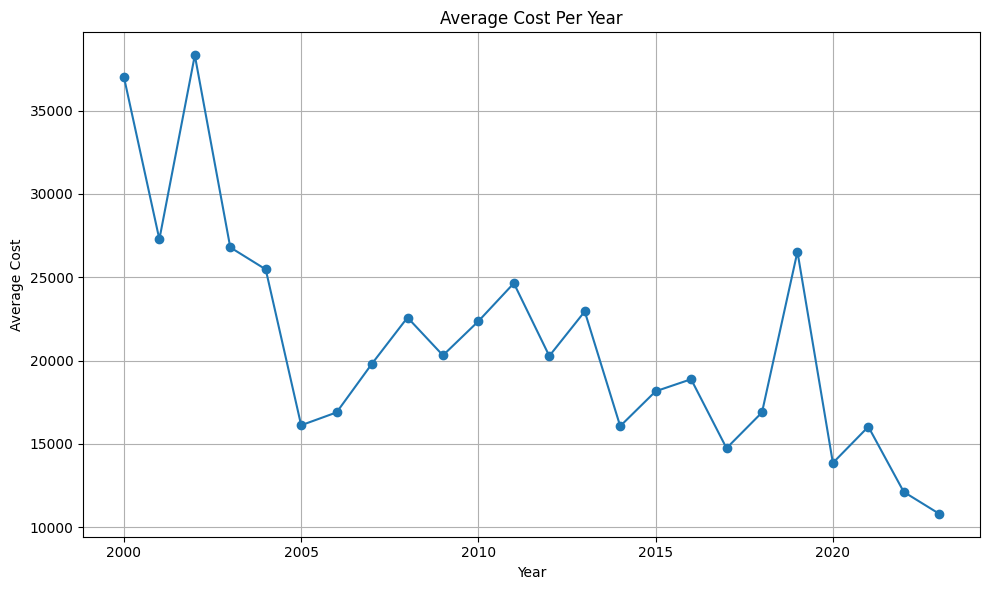

In [24]:
plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(average_cost_per_year['Year'], average_cost_per_year['Average Cost Per Year'], marker='o', linestyle='-')

# Add labels and title
plt.title('Average Cost Per Year')
plt.xlabel('Year')
plt.ylabel('Average Cost')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
Third['Date of Incident/Loss'] = pd.to_datetime(Third['Date of Incident/Loss'])
Third['Transaction Date'] = pd.to_datetime(Third['Transaction Date'])

In [26]:
Third['End Date'] = Third['Date of Incident/Loss'] + timedelta(days=1095)

In [27]:
filtered_data = Third[(Third['Transaction Date'] >= Third['Date of Incident/Loss']) & (Third['Transaction Date'] <= Third['End Date'])]

In [28]:
grouped_filtered_data = filtered_data.groupby('Claim Number')

In [29]:
total_paid_amount = grouped_filtered_data['Paid Amount'].sum()

In [30]:
final_df = pd.merge(total_paid_amount, Third[['Claim Number', 'Date of Incident/Loss']], on='Claim Number', how='left')

In [31]:
final_df.drop_duplicates(subset='Claim Number', inplace=True)

In [32]:
final_df

,Claim Number,Paid Amount,Date of Incident/Loss
0,W200001719,4409.97,2000-01-19
89,W200001956,21689.39,2000-01-20
143,W200003311,16135.29,2000-03-04
362,W200003479,19898.75,2000-03-10
493,W200003906,74958.89,2000-03-13
...,...,...,...
303278,WDWW2023231479,5375.15,2023-03-01
303294,WDWW2023231549,7007.03,2023-03-07
303303,WDWW2023231797,4615.37,2023-02-17
303328,WDWW2023232702,6338.44,2023-02-04


In [33]:
# Extract year from 'Date of Incident/Loss' column
final_df['Year'] = final_df['Date of Incident/Loss'].dt.year

# Group by year and calculate average cost per year
average_cost_per_year = final_df.groupby('Year')['Paid Amount'].mean().reset_index()
average_cost_per_year.rename(columns={'Paid Amount': 'Average Cost Per Year'}, inplace=True)


In [34]:
average_cost_per_year

,Year,Average Cost Per Year
0,2000,48976.165833
1,2001,34752.448750
2,2002,43873.764186
3,2003,36992.931591
4,2004,31461.999694
5,2005,19045.727976
6,2006,18460.502190
7,2007,23688.311294
8,2008,25389.690540
9,2009,22813.177076


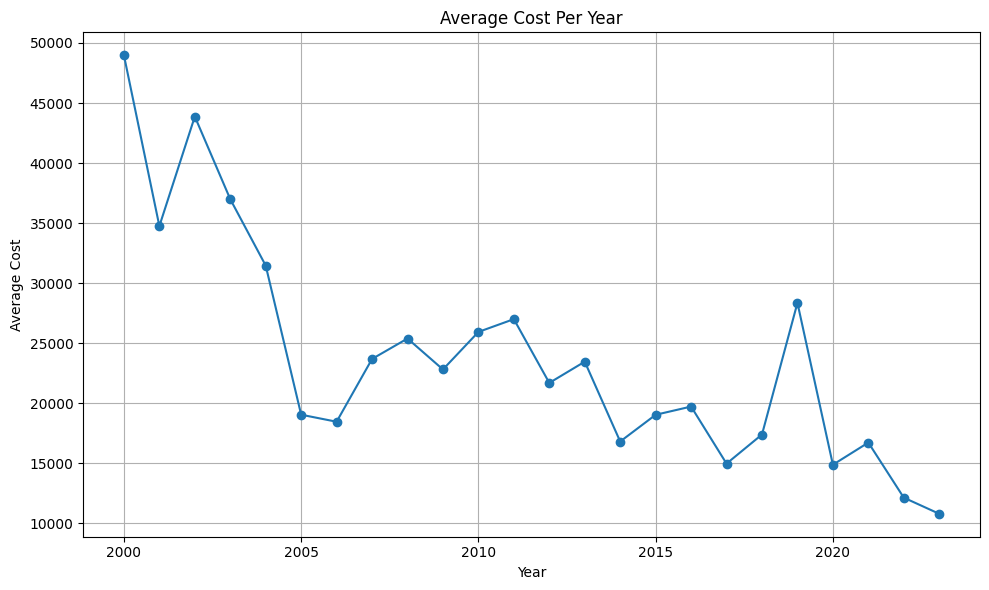

In [35]:
plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(average_cost_per_year['Year'], average_cost_per_year['Average Cost Per Year'], marker='o', linestyle='-')

# Add labels and title
plt.title('Average Cost Per Year')
plt.xlabel('Year')
plt.ylabel('Average Cost')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
First

NameError: name 'First' is not defined